# 1. Business Framing & Project overview

## Background

Manufacturing equipment is often utilized without a planned maintenance approach. Such a strategy frequently results in unplanned downtime, owing to unexpected failures. Scheduled maintenance replaces components frequently to avoid unexpected equipment stoppages, but increases the time associated with machine non-operation and maintenance cost. The emergence of Industry 4.0 and smart systems is leading to increasing attention to predictive maintenance (PdM) strategies that can decrease the cost of downtime and increase the availability (utilization rate) of manufacturing equipment. PdM also has the potential to foster sustainable practices in manufacturing by maximizing the useful lives of components.

This project is approach of Machine learning implementation (Random Forest) for Predictive Maintenance.

## Dataset source information

Dataset source from UCI link here [link text](https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset)

## Objective

This project is try to answer below business question:

1.   What is the most suitable Random Forest model that fit for Predictive Maintenance reperesent by dataset?
2.   What is features/attribute the model ‘thinks’ are most important in determining failure of the machine?

# 2. Data understanding

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import datetime
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Load Data

In [2]:
data = pd.read_csv('predictive_maintenance.csv')

## Sample of data

In [3]:
# Showing top 5 rows of the data
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
# sample 5 rows of the data
# the results change everytime the code is executed (random sample)
data.sample(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
7078,7079,L54258,L,300.7,310.5,1357,52.6,199,0,No Failure
6299,6300,L53479,L,301.2,310.6,1385,49.2,105,0,No Failure
2746,2747,L49926,L,299.7,309.2,1411,46.1,173,0,No Failure
8251,8252,L55431,L,299.0,310.4,1981,21.2,125,0,No Failure
5927,5928,L53107,L,300.2,310.1,1649,30.5,43,0,No Failure


Feature information:

*   `UDI`: unique identifier ranging from 1 to 10000.
*   `Product ID`: Product Identification number.
*   `Type`: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number.
*   `Air temperature [K]`: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K.
*   `Process temperature [K]`: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
*   `Rotational speed [rpm]`: calculated from powepower of 2860 W, overlaid with a normally distributed noise.
*   `Torque [Nm]`: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
*   `Tool wear [min]`: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.
*   `Target`: Categorixe condition of the Machine = Failure or Not.
*   `Failure Type`: Type of Failure, there are tool wear failure (TWF), Heat Dissipation Failure (HDF), Power Failure (PWF), Overstrain Failure (OSF), Random Failures (RNF).


## General Information & Missing Values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


Observation:
1. Data contains 10 columns with 422 rows.
2. There is no missing value within the dataset.
3. `Product ID`, `Type` & `Failure Type` column is categorical, the rest is numerical.

In [6]:
# re-check missing values per column
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

No missing values! :)

## Duplicated data check

In [7]:
# number of duplicated data
data.duplicated().sum()

0

Data don't have any duplicate row as well!!

## Drop irrelevant feature

In [8]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

Feature irrelevant:

*  `UDI`: just give index information.
*  `Product ID`: just give product index information.
*  `Failure Type`: because this model only would like to identify Failure or not, without further analyize type of machine failure.

In [9]:
data.drop(['UDI', 'Product ID','Failure Type'], axis=1, inplace=True)

In [10]:
data.sample(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
6754,L,301.8,311.1,1495,36.9,197,0
6057,L,300.8,310.8,1689,32.9,151,0
4983,L,303.8,313.1,1869,25.8,211,0
3827,M,302.4,310.9,1469,41.6,124,0
862,H,296.1,306.8,1645,31.0,41,0
7429,L,300.0,311.4,1590,33.6,5,0
2307,H,299.0,308.5,1623,33.5,154,0
4819,L,303.6,312.2,1696,30.7,5,0
7275,L,300.2,310.3,1514,38.7,48,0
6601,M,301.5,310.7,1347,47.9,29,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


## Statistical summary

In [12]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['Type']

numericals = ['Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target']

In [13]:
# numerical statistical sumary
data[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Target,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


Observation:
* Overall, the minimum and maximum values make sense for each column
* `Target` column is boolean/binary column since the value is 0 or 1, no need to conclude its simmetricity. As this can be a target variable for modelling, we will inspect the balance-level later.
* Mean ~ 50% (Median) in `Air temperature [K]`, `Process temperature [K]`,`Rotational speed [rpm]`, `Torque [Nm]` & `Tool wear [min]` column, indicating somewhat a symmetrical distribution.

In [14]:
# describe method on categorical data
data[categoricals].describe()

,Type
count,10000
unique,3
top,L
freq,6000


Observations:
* `Type` have 3 unique value, 'H','M' and 'L'.
* 'L' large machine type is dominated the dataset with 6000 product.

In [15]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of Type column
L    6000
M    2997
H    1003
Name: Type, dtype: int64 



# 3. Perform Exploratory Data Analysis

## Univariat Analysis

### Boxplot to detect outliers

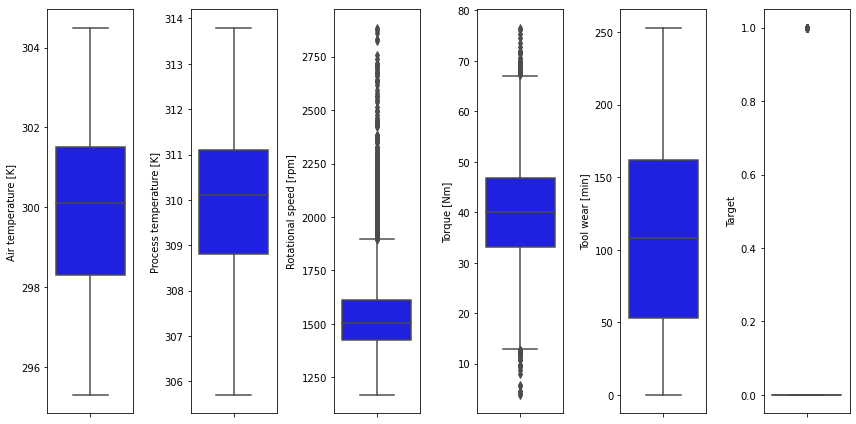

In [16]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='blue')
    plt.tight_layout()

Observations:

In [17]:
outlier = data['Rotational speed [rpm]'].max()

data[data['Rotational speed [rpm]'] == outlier]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
1784,L,298.3,308.0,2886,3.8,57,1


Obervation:
1. There are outlier in the `Rotational speed [rpm]` column.
2. But the value is still reasonable (NOT that extreme), hence no need to handle speficically

In [18]:
outlier = data['Torque [Nm]'].max()

data[data['Torque [Nm]'] == outlier]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
7763,L,300.4,311.6,1200,76.6,3,1


In [19]:
outlier = data['Torque [Nm]'].min()

data[data['Torque [Nm]'] == outlier]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
1784,L,298.3,308.0,2886,3.8,57,1


Obervation:
1. There are outlier in the `Torque [Nm]` column.
2. But the value is still reasonable (NOT that extreme), hence no need to handle speficically

### KDE plot for knowing the distribution form

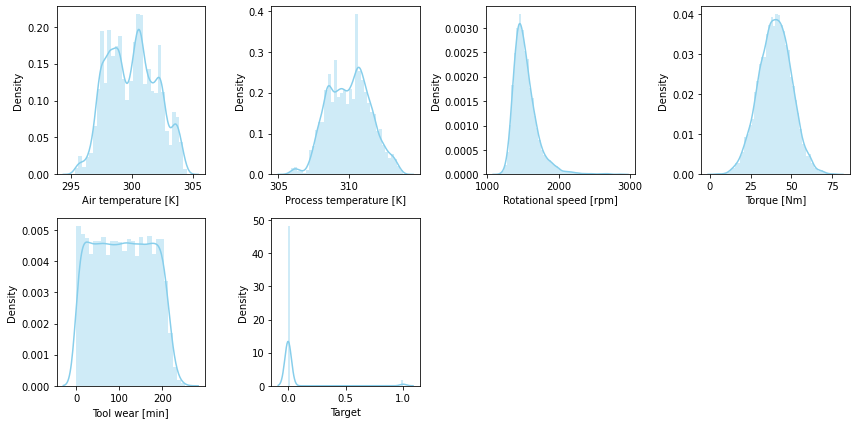

In [20]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
1. The true continuous numeric features: `Air temperature [K]`, `Process temperature [K]`,`Rotational speed [rpm]`, `Torque [Nm]` & `Tool wear [min]` which  is good (no need to transform them to approximate normal distribution)
2. In terms of the target variable, `Target = 0` is more frequent in the dataset. But, the imbalance condition is NOT severe (still OK)

## Bivariate Analysis

In [21]:
# remember the dataset
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


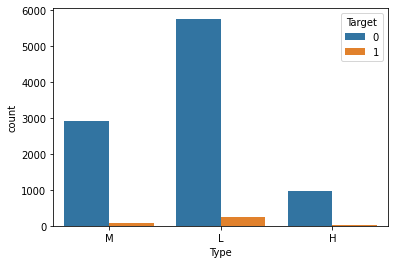

In [22]:
# Type of machine relation to target failure?
sns.countplot(data=data,
            hue='Target',
            x='Type')

1. Let's say target = 1, means Failure, and admit_status = 0, means Not Failure
2. We can say that, machine with Low capacity has more frequent to be Failure compare to High or Medium.

## Multivariate Analysis

In [23]:
# Rank Encoding for Type feature
### Create Dictionary
type_dict = {'L':0,'M':1,'H':2}

In [24]:
data['Type'] = data['Type'].map(type_dict)
data.head(2)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,298.1,308.6,1551,42.8,0,0
1,0,298.2,308.7,1408,46.3,3,0


In [25]:
#check data type
data.dtypes

Type                         int64
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
dtype: object

All data already numericals!

### Heatmap correlation

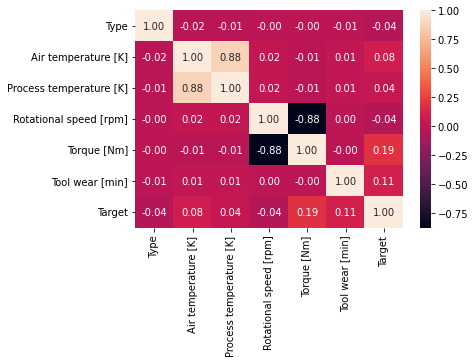

In [26]:
# correlation heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observations:
- There are higher positive correlation between `Air Temperature` & `Process Teperature`.
- According to `Target` feature another column relatively has low correlation, but we will check later with the model.

# 4. Random Forest Model 

## Check Target Features

In [27]:
data['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

Observations:
*   0 = No Failure Machine, 1 = Failure Machine
*   Target data is imbalanced wth most of them No Failure Machine

## Classification Task Definition

Before going further lets make clear definition of classification task in this model:

TASK = To Predict Condition of Machine Failure or Not Failure

*   Failure = POSITIVE
*   No Failure =  NEGATIVE

*   TRUE POSITIVE = Predicted Failure, actual is Failure
*   TRUE NEGATIVE = Predicted No Failure, actual is No Failure
*   FALSE POSITIVE = Predicted Failure, actual is No Failure
*   FALSE NEGATIVE = Predicted No Failure, actual is Failure

Evaluation Metric:

    - PRECISSION = TP/(TP+FP)

    - RECALL = TP/(TP+FN)

    - F1 SCORE = 2 * (precision * recall)/(precision + recall)

    - ROC AUC

ROC is a probability curve and AUC represents the degree or measure of separability (value between 0 to 1).
The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
***The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.***

In this case we wouldlike to **reduce FALSE NEGATIVE**, because it's more severe condition of Predicted No Failure, actual is Failure that could impact to Machine stop operating (loss more cost to Maintenance & Loss productive time).

So that, we need Random Forest model with **high score of RECALL**,  higher RECALL means higher Sensitivity of the model, and aslo **high AUC probability value**.

## Dataset Splitting

Spiltting data into two part:
*   data training
*   data testing

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
data_train, data_test = train_test_split(data, test_size = 0.25, random_state = 1) 

In [30]:
x_train_data = data_train.loc[:, data_train.columns!='Target']
y_train_data = data_train.loc[:, data_train.columns=='Target']

x_test_data = data_test.loc[:, data_test.columns!='Target']
y_test_data = data_test.loc[:, data_test.columns=='Target']

## Running the Model

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [32]:
def evaluate(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))
    print('-----')
    print('ROC AUC')
    
    plot_roc_curve(model, x_test, y_test)
    print('Area under Curve of the ROC:', roc_auc_score(y_test,
                                                       model.predict_proba(x_test)[:,1]))
    

### Base Model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.984
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2411
           1       0.93      0.60      0.73        89

    accuracy                           0.98      2500
   macro avg       0.96      0.80      0.86      2500
weighted avg       0.98      0.98      0.98      2500

------
Assuming 1 as positive, we get:

True Positive: 53
True Negative: 2407
False Positive: 4
False Negative: 36

Precision: 0.9298245614035088
Recall: 0.5955056179775281
F1-Score: 0.726027397260274
-----
ROC AUC
Area under Curve of the ROC: 0.977029439041099


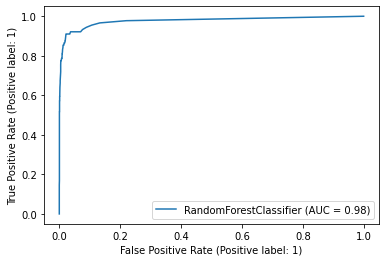

In [33]:
base_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
base_model.fit(x_train_data, y_train_data)
evaluate(base_model, x_test_data, y_test_data)

Eventhough the model's accuracy scores is very high (see Precission score), this is because the imbalanced data. Because '1' is the 'positive', then the precision, recall, and f1-score of this model is poor because this model cannot predict positive values well. 

### Undersampling

Undersampling balances the dataset by reducing the size of the abundant class.
By keeping all samples in the rare class and randomly selecting an equal number of samples in the abundant class, a balanced new dataset can be retrieved for further modelling.

In [34]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print('data target distribution before undersampled',Counter(y_train_data['Target']))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
x_train_under, y_train_under = undersample.fit_resample(x_train_data, 
                                                        y_train_data)

# summarize class distribution
print('data target distribution after undersampled',Counter(y_train_under['Target']))

data target distribution before undersampled Counter({0: 7250, 1: 250})
data target distribution after undersampled Counter({0: 250, 1: 250})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.912
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2411
           1       0.29      0.98      0.44        89

    accuracy                           0.91      2500
   macro avg       0.64      0.94      0.70      2500
weighted avg       0.97      0.91      0.93      2500

------
Assuming 1 as positive, we get:

True Positive: 87
True Negative: 2193
False Positive: 218
False Negative: 2

Precision: 0.28524590163934427
Recall: 0.9775280898876404
F1-Score: 0.44162436548223355
-----
ROC AUC
Area under Curve of the ROC: 0.9752468787719208


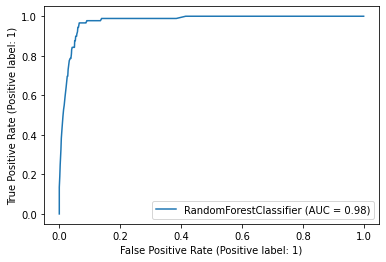

In [35]:
under_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
under_model.fit(x_train_under, y_train_under)
evaluate(under_model, x_test_data, y_test_data)

Suddenly, our model improves in the recall!

Higher Recall means: Among data that actually Positive, 97% of them are predicted as Positive (correctly predicts positive data). But, Precission score is poor!!

### Oversampling

Oversampling is used when the quantity of data is insufficient. 
It tries to balance dataset by increasing the size of rare samples.

In [36]:
# import random undersampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print('data target distribution before oversampled',Counter(y_train_data['Target']))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train_data, y_train_data)

# summarize class distribution
print('data target distribution before oversampled',Counter(y_train_SMOTE['Target']))

data target distribution before oversampled Counter({0: 7250, 1: 250})
data target distribution before oversampled Counter({0: 7250, 1: 7250})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.9644
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2411
           1       0.50      0.76      0.60        89

    accuracy                           0.96      2500
   macro avg       0.75      0.87      0.79      2500
weighted avg       0.97      0.96      0.97      2500

------
Assuming 1 as positive, we get:

True Positive: 68
True Negative: 2343
False Positive: 68
False Negative: 21

Precision: 0.5
Recall: 0.7640449438202247
F1-Score: 0.6044444444444443
-----
ROC AUC
Area under Curve of the ROC: 0.9731404284669048


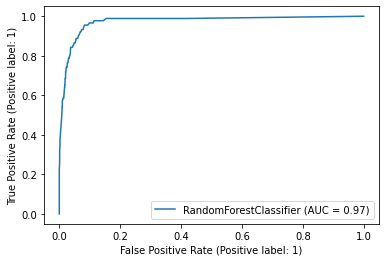

In [37]:
over_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(over_model, x_test_data, y_test_data)

We are seeing improve Recall than undersampling model, but lower Precision than the Base model, and not so much different AUC probability value from Base & Undersampling model.

### Combining Oversampling and Undersampling

/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


Accuracy: 0.9724
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2411
           1       0.58      0.80      0.67        89

    accuracy                           0.97      2500
   macro avg       0.79      0.89      0.83      2500
weighted avg       0.98      0.97      0.97      2500

------
Assuming 1 as positive, we get:

True Positive: 71
True Negative: 2360
False Positive: 51
False Negative: 18

Precision: 0.5819672131147541
Recall: 0.797752808988764
F1-Score: 0.6729857819905214
-----
ROC AUC
Area under Curve of the ROC: 0.9790240424272645


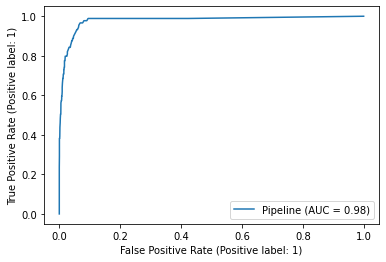

In [38]:
# import needed libraries 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# define pipeline
combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(x_train_data, y_train_data)
evaluate(pipeline, x_test_data, y_test_data)

By doing oversampling and then undersampling, we have a model that is the best in f1-score.

### Finding Best Coefficient of Oversampling and Undersampling

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tqdm import tqdm

import warnings
warnings.simplefilter(action='ignore')

oversampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
undersampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

result = {
    'over_coef':[],
    'under_coef':[],
    'acc':[],
    'prec':[],
    'recall':[],
    'f1':[]
}

for over_score in tqdm(oversampling_coef):
    for under_score in undersampling_coef:
        try:
            combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
            over = SMOTE(sampling_strategy = over_score)
            under = RandomUnderSampler(sampling_strategy = under_score)
            steps = [('o', over), ('u', under), ('model', combined_model)]
            pipeline = Pipeline(steps = steps)

            pipeline.fit(x_train_data, y_train_data)
            y_pred = pipeline.predict(x_test_data)

            result['over_coef'].append(over_score)
            result['under_coef'].append(under_score)
            result['acc'].append(accuracy_score(y_test_data, y_pred))
            result['prec'].append(precision_score(y_test_data, y_pred))
            result['recall'].append(recall_score(y_test_data, y_pred))
            result['f1'].append(f1_score(y_test_data, y_pred))
        except:
            pass
        

100%|██████████| 10/10 [00:56<00:00,  5.70s/it]


In [40]:
data_result = pd.DataFrame(result)

In [41]:
data_result

,over_coef,under_coef,acc,prec,recall,f1
0,0.1,0.1,0.9856,0.811765,0.775281,0.793103
1,0.1,0.2,0.9772,0.637931,0.831461,0.721951
2,0.1,0.3,0.9700,0.548611,0.887640,0.678112
3,0.1,0.4,0.9584,0.456140,0.876404,0.600000
4,0.1,0.5,0.9460,0.391509,0.932584,0.551495
5,0.1,0.6,0.9504,0.413793,0.943820,0.575342
6,0.1,0.7,0.9424,0.374429,0.921348,0.532468
7,0.1,0.8,0.9312,0.334661,0.943820,0.494118
8,0.1,0.9,0.9260,0.316794,0.932584,0.472934
9,0.1,1.0,0.9248,0.314607,0.943820,0.471910


# 5. Evaluation, Choose The Best Model & Check Feature Importance

## Model with highest accuracy

In [42]:
highest_accuracy = data_result.sort_values(['acc'], ascending = [False])
highest_accuracy.head(1)

,over_coef,under_coef,acc,prec,recall,f1
0,0.1,0.1,0.9856,0.811765,0.775281,0.793103


Model with highest Accuracy configuration : 
*   oversampled coef = 0.1
*   undersampled coef = 0.1

## Model with highest Precission

In [43]:
highest_precission = data_result.sort_values(['prec'], ascending = [False])
highest_precission.head(1)

,over_coef,under_coef,acc,prec,recall,f1
0,0.1,0.1,0.9856,0.811765,0.775281,0.793103


Model with highest Precission configuration : 
*   oversampled coef = 0.1
*   undersampled coef = 0.1

## Model with highest F1 Score

In [44]:
highest_f1score = data_result.sort_values(['f1'], ascending = [False])
highest_f1score.head(1)

,over_coef,under_coef,acc,prec,recall,f1
0,0.1,0.1,0.9856,0.811765,0.775281,0.793103


Model with highest F1 Score configuration : 
*   oversampled coef = 0.1
*   undersampled coef = 0.1

## Model with highest Recall

In [45]:
highest_recall = data_result.sort_values(['recall'], ascending = [False])
highest_recall.head(1)

,over_coef,under_coef,acc,prec,recall,f1
5,0.1,0.6,0.9504,0.413793,0.94382,0.575342


Model with highest Recall configuration : 
*   oversampled coef = 0.1
*   undersampled coef = 0.9

## Check Feature Importance

compute feature importance for the Random Forest with scikit-learn package

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [47]:
data = pd.read_csv('predictive_maintenance.csv')
data.drop(['UDI', 'Product ID','Failure Type'], axis=1, inplace=True)
type_dict = {'L':0,'M':1,'H':2}
data['Type'] = data['Type'].map(type_dict)

In [57]:
data_train, data_test = train_test_split(data, test_size = 0.25, random_state = 1) 

x_train_data = data_train.loc[:, data_train.columns!='Target']
y_train_data = data_train.loc[:, data_train.columns=='Target']

x_test_data = data_test.loc[:, data_test.columns!='Target']
y_test_data = data_test.loc[:, data_test.columns=='Target']

Fit the Random Forest Regressor with 100 Decision Trees:

In [58]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train_data, y_train_data)

RandomForestRegressor()

To get the feature importances from the Random Forest model use the feature_importances_ attribute:

In [59]:
rf.feature_importances_

array([0.02586787, 0.18960491, 0.15987556, 0.12977247, 0.33986072,
       0.15501847])

Let’s plot the importances (chart will be easier to interpret than values).

Text(0.5, 0, 'Random Forest Feature Importance')

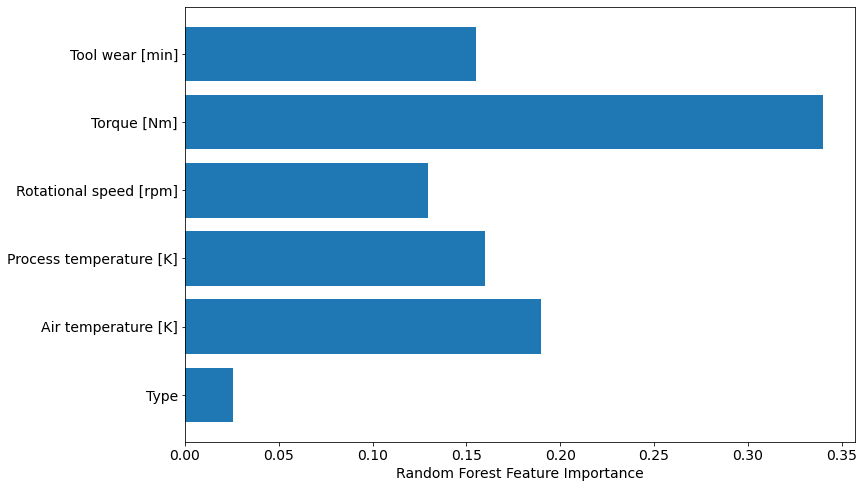

In [76]:
plt.barh(('Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]'), rf.feature_importances_)

plt.xlabel("Random Forest Feature Importance")

Top 3 Feature Importance of this Random Forest model are `Torque [Nm]`, `Air temperature [K]` & `Process temperature [K]`

# 6. Conclusion

Best Random Forest model for this project is Combine Undersampling & Oversampling method (with higest RECALL score)
Model configuration: 
*   oversampled coef = 0.1
*   undersampled coef = 0.9  

Top 3 Feature Importance of this Random Forest model are:
- `Torque [Nm]`, 
- `Air temperature [K]`  
- `Process temperature [K]`
